<a href="https://colab.research.google.com/github/ingridmidory/Machine-Learning-with-Python-/blob/main/Irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Librerias y datos

Empezamos importando las librerias que vamos a usar.





In [ ]:
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

Ahora, cargamos los datos a nuestro notebook.

In [ ]:
df_ad = pd.read_csv("/content/iris.csv")
df_ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Podemos observar en la tabla de arriba que nos describe las columnas que contiene nuestro archivo, así como la cantidad de datos por columna y el tipo de objeto.



In [ ]:
col = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
df_ad = df_ad[col]
df_ad

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Como podemos observar en la tabla, los datos que contine son el tamaño y longitud del sépalo y el pétalo de una flor y, dependiendo de estos tamaños, podemos hacer una clasificación en especies.

# Analizyng the data

Ahora, analizaremos los datos. Para esto, primero descargamos la librería seaborn que nos ayuda con las gráficas de nuestros datos.

<function matplotlib.pyplot.show(close=None, block=None)>

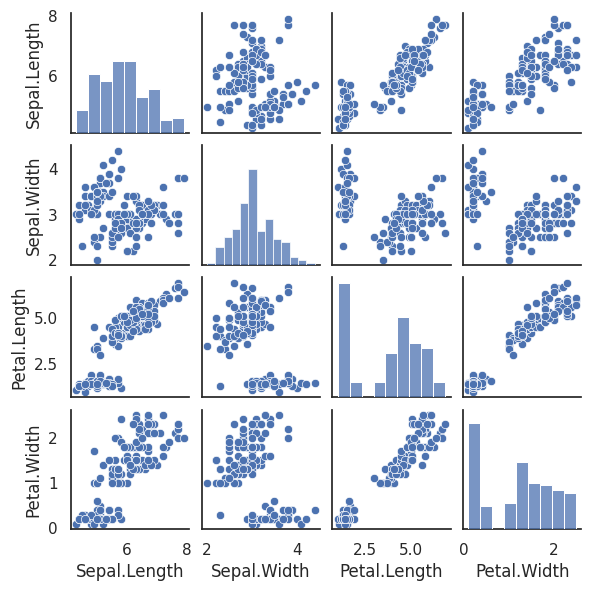

In [ ]:
import seaborn as sns #libreria para graficas
sns.set(style = 'white', context = 'notebook') #estilo de la grafica
sns.pairplot(df_ad, height = 1.5) #graficas de dispersion
plt.show

La gráficas anteriores son "pair plot" o gráfico de pares, que es útil para visualizar las relaciones entre múltiples variables.

Observamos lo siguiente:

1.   Diagonales: Las gráficas en la diagonal son histogramas que muestran la distribución de cada variable individualmente. Por ejemplo, el primer gráfico en la diagonal (arriba a la izquierda) muestra la distribución de la longitud del sépalo (Sepal.Length).

2.   Gráficos de Dispersión: Los gráficos fuera de la diagonal son gráficos de dispersión que muestran la relación entre dos variables. Por ejemplo, la gráfica en la primera fila y la segunda columna muestra la relación entre la longitud del sépalo (Sepal.Length) y el ancho del sépalo (Sepal.Width).

Sobre las relaciones entre variables hay una clara relación lineal positiva entre la longitud del pétalo (Petal.Length) y el ancho del pétalo (Petal.Width).
La relación entre la longitud del sépalo (Sepal.Length) y la longitud del pétalo (Petal.Length) también parece ser positiva.
Las relaciones entre el ancho del sépalo (Sepal.Width) y las otras variables no parecen ser tan claras, pero aún muestran ciertos patrones.






# Heat Map


Un heatmap (o mapa de calor) es una representación gráfica que muestra datos en una matriz, utilizando colores para indicar los valores de los datos. Es especialmente útil para visualizar la correlación entre variables en un conjunto de datos.

<Axes: >

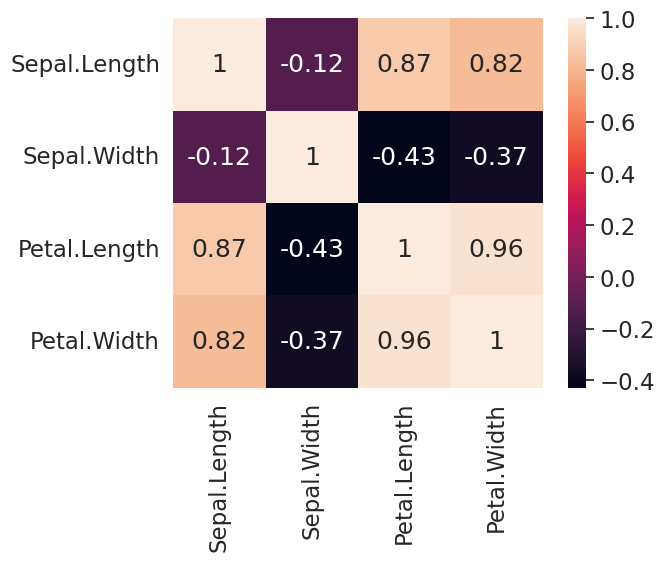

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Select only the numeric columns
numeric_df = df_ad.select_dtypes(include=[np.number])

cm = np.corrcoef(numeric_df.values.T) #matriz de coeficientes de correlacion
sns.set(font_scale=1.5) #tamaño de la fuente
sns.heatmap(cm, cbar=True, annot=True, square=True,
            yticklabels=numeric_df.columns,
            xticklabels=numeric_df.columns) #grafica de correlacion

Se presenta arriba el heatmap de nuestros datos, donde podemos observar lo siguiente:

1. Correlaciones Fuertes Positivas:

Petal.Length y Petal.Width: Hay una fuerte correlación positiva (0.96), lo que indica que a medida que la longitud del pétalo aumenta, el ancho del pétalo también tiende a aumentar.
Sepal.Length y Petal.Length: También hay una fuerte correlación positiva (0.87), lo que sugiere que a medida que la longitud del sépalo aumenta, la longitud del pétalo también tiende a aumentar.
Sepal.Length y Petal.Width: Hay una fuerte correlación positiva (0.82), indicando que la longitud del sépalo y el ancho del pétalo tienden a aumentar juntos.

2.   Correlaciones Negativas:

Sepal.Width y Petal.Length: Hay una correlación negativa moderada (-0.43), lo que indica que cuando la longitud del pétalo aumenta, el ancho del sépalo tiende a disminuir, aunque no es una relación muy fuerte.
Sepal.Width y Petal.Width: También hay una correlación negativa (-0.37), lo que sugiere una tendencia similar a la anterior.

3. Correlaciones Débiles:

Sepal.Length y Sepal.Width: La correlación es muy baja (-0.12), lo que indica que no hay una relación clara entre la longitud del sépalo y el ancho del sépalo.





# Correlation Matrix

La matriz de coeficientes de correlación es una herramienta estadística que muestra la relación entre dos o más variables. Cada celda en la matriz contiene un coeficiente de correlación que cuantifica la relación lineal entre dos variables.

In [ ]:
import numpy as np
import pandas as pd

# Select only the numeric columns
numeric_df = df_ad.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric DataFrame
np.corrcoef(numeric_df.values.T) #matriz de coeficientes de correlacion

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

En la matriz de correlación observamos lo siguiente:

1. Diagonal Principal:

Los elementos de la diagonal principal (1, 1, 1, 1) indican la autocorrelación de cada variable consigo misma, lo cual siempre es igual a 1.

2. Fuertes Correlaciones Positivas:



*   Sepal.Length y Petal.Length: 0.8718.

Una fuerte correlación positiva. A medida que la longitud del sépalo aumenta, la longitud del pétalo también tiende a aumentar

*   Sepal.Length y Petal.Width: 0.8179.

También una fuerte correlación positiva. A medida que la longitud del sépalo aumenta, el ancho del pétalo también tiende a aumentar.
*  Petal.Length y Petal.Width: 0.9629

Muy fuerte correlación positiva. Estas dos variables tienden a crecer juntas de manera significativa.

3. Correlaciones Negativas:

* Sepal.Width y Sepal.Length: -0.1176

Correlación negativa débil. No hay una relación clara entre estas dos variables.

* Sepal.Width y Petal.Length: -0.4284

Correlación negativa moderada. A medida que la longitud del pétalo aumenta, el ancho del sépalo tiende a disminuir.
* Sepal.Width y Petal.Width: -0.3661

Correlación negativa moderada. A medida que el ancho del pétalo aumenta, el ancho del sépalo tiende a disminuir.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Con ayuda del análisis anterior, podemos definir las variables que deseamos comparar para nuestro modelo de regresion lineal. Tomaremos las que se relacionan de una manera fuertmente positiva, Sepal length y Petal length.

In [ ]:
x = np.array (df_ad[['Sepal.Length']])
y = np.array (df_ad['Petal.Length'])

In [ ]:
x

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

# Getting the Linear Model

In [ ]:
lm_fit = LinearRegression()
lm_fit.fit(x,y)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(x,y)}") #pendiente de la recta e interseccion con el eje x

 intercept:-7.101443369602455 
 R^2 : 0.759954645772515


El coeficiente R^2 o coeficiente de determinación, es una medida estadística que representa la proporción de la varianza de la variable dependiente que es predecible a partir de la variable independiente(s) en un modelo de regresión. En otras palabras, indica cuánta variabilidad en los datos puede explicarse por el modelo de regresión.

En este caso R^2 de aproximadamente 0.76 indica que el modelo de regresión lineal que ajustaste explica alrededor del 76% de la variabilidad de los datos de la variable dependiente (y) utilizando la variable independiente (x). Esto sugiere que el modelo tiene una buena capacidad predictiva en relación con los datos observados.

In [ ]:
import statsmodels.api as sm

lm_fit_OLS = sm.OLS(y, x).fit ()
print(lm_fit_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              1334.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                    3.02e-76
Time:                        17:23:21   Log-Likelihood:                         -253.92
No. Observations:                 150   AIC:                                      509.8
Df Residuals:                     149   BIC:                                      512.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

A continuación, generamos la ecuación de la recta de regresión que resulta del modelo ajustado.

In [ ]:
print (f" Sepal.Length ={lm_fit.intercept_} + {lm_fit.coef_} Petal.Length")

 Sepal.Length =-7.101443369602455 + [1.85843298] Petal.Length


Esta ecuación te permite predecir o calcular valores de Sepal.Length basados en valores dados de Petal.Length utilizando el modelo de regresión lineal ajustado.

Ahora vamos a predecir valores; es decir, poner a pruebas el modelo que ya hicimos:

In [ ]:
lenght = 4.6
Sepal_lenght= np.array([[lenght]])
lm_fit.predict(Sepal_lenght)

array([1.44734833])

Esto significa que tu modelo ha predicho que para un valor de Petal.Length de 4.6, el valor estimado de Sepal.Length es aproximadamente 1.447.

Ahora, agregamos una  columna llamada 'predicted' a un DataFrame df_ad, donde se almacenan las predicciones realizadas por tu modelo de regresión lineal (lm_fit) para cada fila de datos representada por el conjunto de características x.

In [ ]:
df_ad['predicted'] = lm_fit.predict(x)
df_ad

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,predicted
0,5.1,3.5,1.4,0.2,setosa,2.376565
1,4.9,3.0,1.4,0.2,setosa,2.004878
2,4.7,3.2,1.3,0.2,setosa,1.633192
3,4.6,3.1,1.5,0.2,setosa,1.447348
4,5.0,3.6,1.4,0.2,setosa,2.190722
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,5.350058
146,6.3,2.5,5.0,1.9,virginica,4.606684
147,6.5,3.0,5.2,2.0,virginica,4.978371
148,6.2,3.4,5.4,2.3,virginica,4.420841


Agregamos una columna a la tabla llamada "predicted" que me ayuda a predecir los valores. Esto nos ayuda a mantener la informacion en una sola tabla.

In [ ]:
df_ad['residuals']=df_ad['Sepal.Length']-df_ad['predicted']

mse = np.mean(df_ad['residuals']**2)
rmse = np.sqrt(mse)

n= len(df_ad)
p=1
rse = rmse * np.sqrt((n)/(n-p-1))

print(f"MSE: {mse}")

MSE: 4.850538965867875


Un MSE de 4.850538965867875 proporciona una medida cuantitativa del rendimiento del modelo de regresión, indicando cómo de cerca están las predicciones del modelo de los valores reales en los datos de Sepal.Length.

In [ ]:
def RSE (y_true, y_predicted):

  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS=np.sum(np.square(y_true-y_predicted))

  rse= math.sqrt(RSS/ (len(y_true)-2))

  return rse

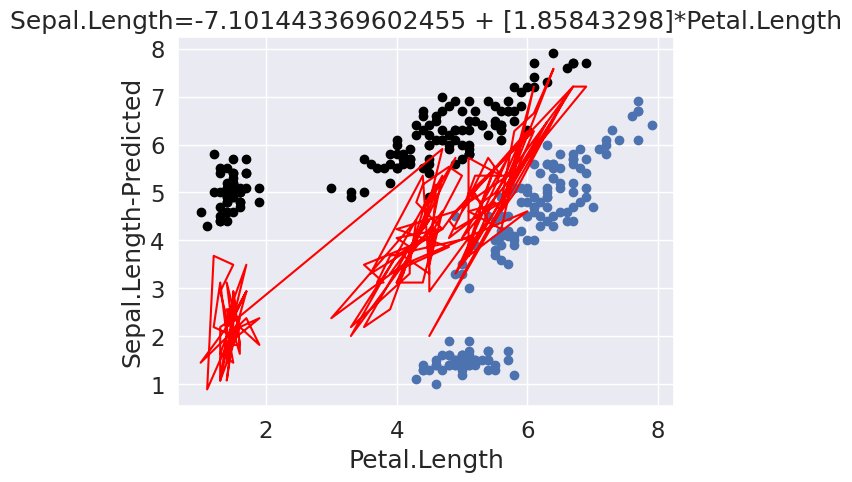

In [ ]:
plt.scatter(df_ad['Petal.Length'], df_ad['Sepal.Length'], color='black')
plt.plot(df_ad['Petal.Length'], df_ad['predicted'], color='red')

plt.title (f"Sepal.Length={lm_fit.intercept_} + {lm_fit.coef_}*Petal.Length")
plt.xlabel("Petal.Length")
plt.ylabel("Sepal.Length-Predicted")
plt.scatter(x,y)
plt.show()

La gráfica proporcionada muestra la relación entre la longitud del pétalo y la longitud del sépalo, con una línea de regresión ajustada y los valores predichos. Los puntos negros parecen estar relativamente cerca de la línea de regresión, mientras que los puntos azules muestran una mayor dispersión y se desvían más de la línea.

# Conclusiones

Ajuste del modelo: El R^2 sugiere que el modelo de regresión lineal no explica toda la variabilidad de los datos. Esto podría deberse a que la relación entre la longitud del pétalo y la longitud del sépalo no es puramente lineal, o podría haber otras variables importantes que no se están considerando en el modelo.
Distribución de los residuos: Si los residuos (las líneas rojas que conectan los puntos observados con los predichos) no siguen un patrón aleatorio, podría indicar que el modelo no está capturando adecuadamente la relación entre las variables.

# Agregando una Variable


Consideremos ahora tres variales donde el modelo de regresión lineal múltiple trata de predecir Sepal.Width utilizando tanto Petal.Length como Sepal.Length como variables predictoras.

In [ ]:
yy = df_ad[['Petal.Length', 'Sepal.Length']].values  # Select multiple columns and convert to NumPy array
z = df_ad['Sepal.Width'].values
lm_fit = LinearRegression()
lm_fit.fit(yy, z)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(yy,z)}")

 intercept:1.0380690570704156 
 R^2 : 0.45641497229186523


Podemos observar aquí que la R^2=0.4 significa que el modelo de regresión lineal explica el 45.6% de la variabilidad en la variable dependiente Sepal.Width utilizando las variables independientes Petal.Length y Sepal.Length.



        feature         VIF
0  Petal.Length   36.986432
1  Sepal.Length  205.120674
2   Sepal.Width   85.419726


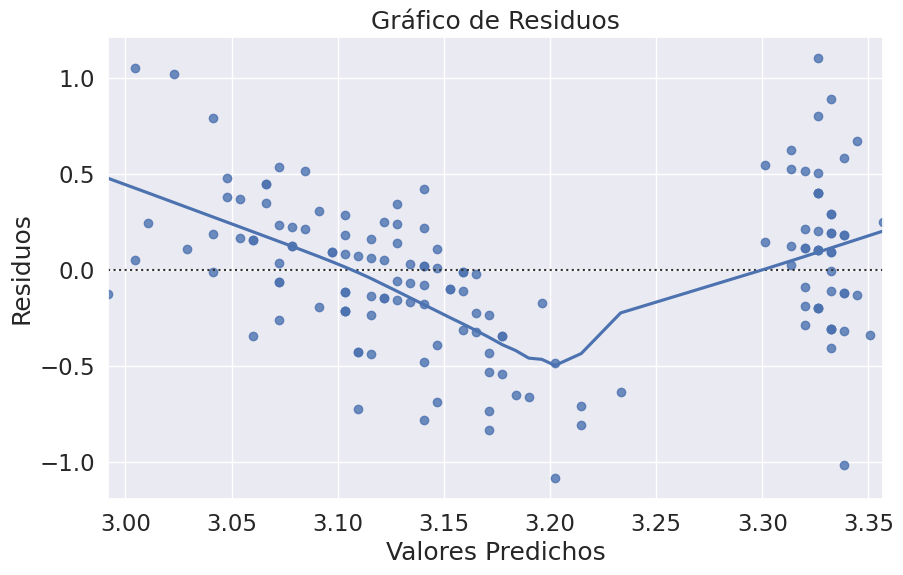

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming df_ad is your original DataFrame
variables = ['Petal.Length', 'Sepal.Length', 'Sepal.Width']
X = df_ad[variables]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Analizar residuos
# The model expects a single feature for prediction, so we need to select the appropriate features from 'yy'
z_pred = lm_fit.predict(yy[:, 0].reshape(-1, 1))  # Predicting using only 'Petal.Length' for example
residuos = z - z_pred

# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=z_pred, y=residuos, lowess=True)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


El gráfico de residuos muestra la relación entre los valores predichos y los residuos. Aquí hay algunas observaciones:

1. Patrón no aleatorio: La línea de tendencia de los residuos no es horizontal y muestra una forma de curva. Esto indica que la relación entre las variables no es lineal, lo que sugiere que un modelo lineal puede no ser la mejor opción para estos datos.

2. Residuos: Hay una variación en la dispersión de los residuos a lo largo de los valores predichos, lo que sugiere heterocedasticidad. Esto viola uno de los supuestos de la regresión lineal y puede afectar la fiabilidad de las inferencias.

# Intento de Regresión Polinómica

Se utilizó un enfoque basado en regresión polinómica para mejorar el ajuste del modelo predictivo. La implementación y optimización del modelo se realizaron con el apoyo de una inteligencia artificial, específicamente ChatGPT, este asistente proporcionó orientación y recomendaciones sobre el proceso de modelado y análisis de datos.

R^2 (Polinómico): 0.5899141871103957
MSE (Polinómico): 0.0773884784427456


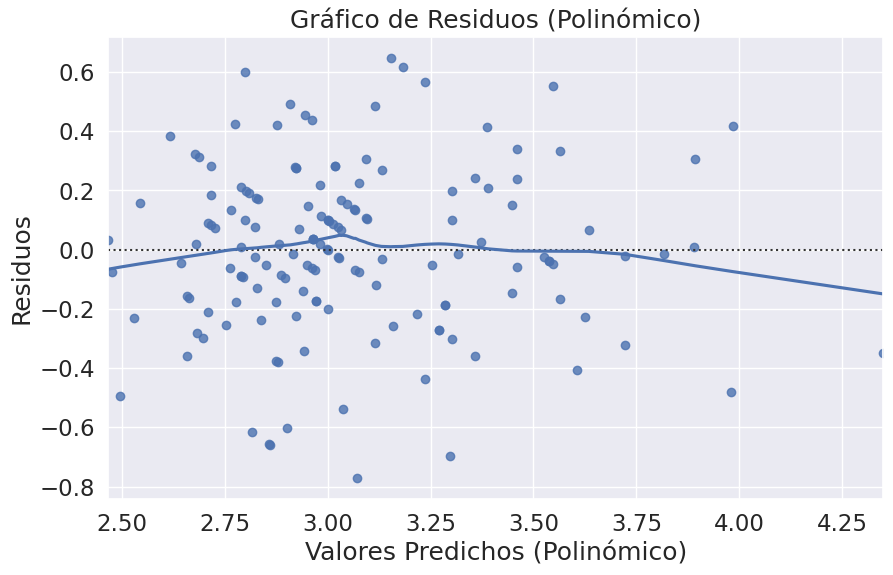

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear un pipeline para la regresión polinómica
poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly, LinearRegression())

# Ajustar el modelo
poly_reg.fit(yy, z)

# Predicciones
z_pred_poly = poly_reg.predict(yy)

# Evaluar el modelo
r2_poly = poly_reg.score(yy, z)
mse_poly = np.mean((z - z_pred_poly) ** 2)

print(f'R^2 (Polinómico): {r2_poly}')
print(f'MSE (Polinómico): {mse_poly}')

# Graficar residuos
residuos_poly = z - z_pred_poly
plt.figure(figsize=(10, 6))
sns.residplot(x=z_pred_poly, y=residuos_poly, lowess=True)
plt.xlabel('Valores Predichos (Polinómico)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (Polinómico)')
plt.show()


Resultados del Modelo Polinómico:

* R^2 polinómico: 0.590 El R^2
ha aumentado de aproximadamente 0.456 a 0.590, lo que indica que el modelo polinómico explica un 59% de la variabilidad en Sepal.Width. Este es un aumento significativo en comparación con el modelo lineal, sugiriendo que la relación entre las variables tiene una naturaleza no lineal que el modelo polinómico captura mejor.

* MSE (Polinómico): 0.077: El error cuadrático medio ha disminuido considerablemente de aproximadamente 4.851 a 0.077. Un MSE más bajo indica que el modelo polinómico tiene un mejor rendimiento en términos de precisión de predicción.

El incremento en R^2 y la disminución en MSE indican que el modelo polinómico se ajusta mejor a los datos que el modelo lineal. Estos resultados sugieren que la relación entre Sepal.Width, Petal.Length, y Sepal.Length es mejor capturada por un modelo no lineal.

Aunque no se ha mostrado el gráfico de residuos del modelo polinómico, es importante verificar que los residuos no muestren patrones claros y que estén distribuidos de manera aleatoria alrededor de cero. Esto ayudaría a confirmar que el modelo polinómico es adecuado.

# Cluster

In [ ]:
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_km =  pd.read_csv("/content/iris.csv")

In [ ]:
df_km.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
data = df_km[['Sepal.Length','Sepal.Width','Petal.Length']]


Se seleccionaron las variables Petal.Length, Sepal.Length y Sepal.Width del conjunto de datos.

Las variables fueron escaladas utilizando StandardScaler para asegurar que todas tuvieran media cero y desviación estándar uno.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

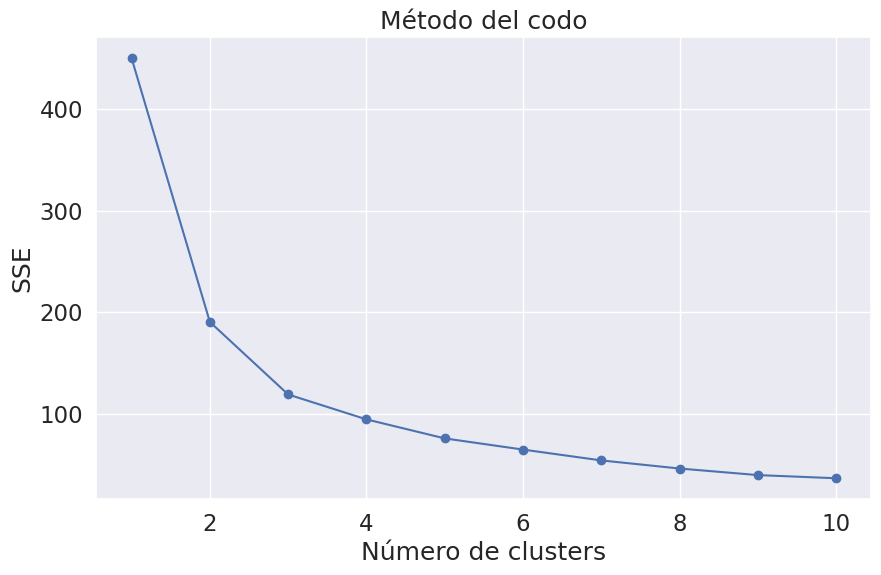

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

Se utilizó el método del codo para determinar el número óptimo de clusters. La gráfica del método del codo sugirió que 3 clusters serían adecuados para nuestros datos.

In [ ]:
optimal_k = 3  # Cambia esto según el resultado del método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Se ajustó el modelo K-means con 3 clusters a los datos escalados.

In [ ]:
df_ad['Cluster'] = clusters


La figura a continuación muestra los clusters identificados mediante el algoritmo K-means:

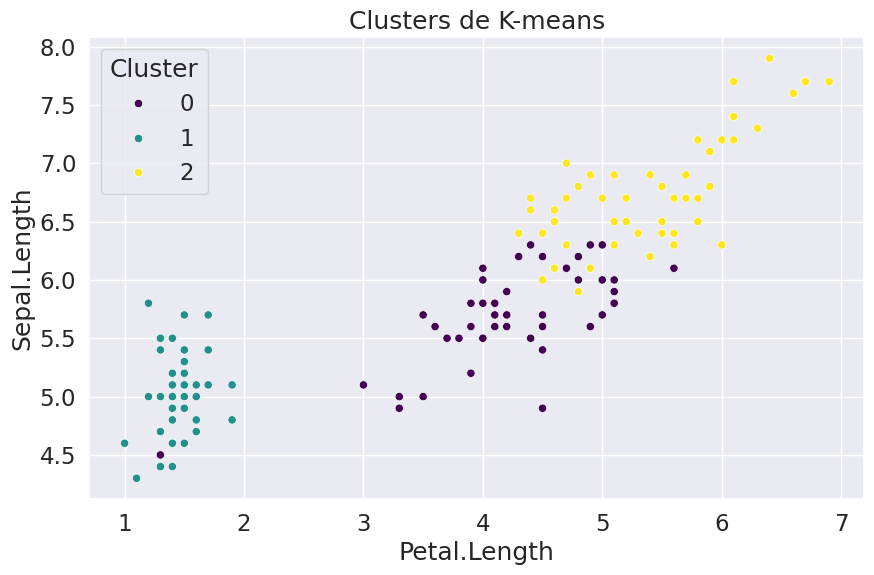

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ad, x='Petal.Length', y='Sepal.Length', hue='Cluster', palette='viridis')
plt.title('Clusters de K-means')
plt.show()

La gráfica muestra los clusters obtenidos mediante el algoritmo K-means, con tres clusters identificados por los colores (0 en morado, 1 en verde, y 2 en amarillo)

Cada color representa un cluster diferente:

* Cluster 0 (Morado): Agrupa puntos con Petal.Length mayor y Sepal.Length intermedio.
* Cluster 1 (Verde): Agrupa puntos con Petal.Length pequeño y Sepal.Length pequeño.
* Cluster 2 (Amarillo): Agrupa puntos con Petal.Length mayor y Sepal.Length grande.

# Conclusiones


El análisis de clustering sugiere que las observaciones pueden agruparse en tres clusters principales, cada uno con características distintivas en términos de las longitudes del sépalo y del pétalo. Estos clusters podrían corresponder a diferentes especies de flores, proporcionando una base para la clasificación basada en medidas morfológicas.